<a href="https://colab.research.google.com/github/lesyayu/robot_deams-_sheets/blob/main/hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Pandas and simple visualization

Дані для домашнього завдання були взяті з Kaggle, по [посиланню](https://www.kaggle.com/aungpyaeap/supermarket-sales) ви зможете знайти їх опис.

*   Invoice id: Computer generated sales slip invoice identification number

*   Branch: Branch of supercenter (3 branches are available identified by A, B and C).

*   City: Location of supercenters

*   Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

*   Gender: Gender type of customer

*   Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

*   Unit price: Price of each product in $

*   Quantity: Number of products purchased by customer

*   Tax: 5% tax fee for customer buying

*   Total: Total price including tax

*   Date: Date of purchase (Record available from January 2019 to March 2019)

*   Time: Purchase time (10am to 9pm)

*   Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

*   COGS: Cost of goods sold

*   Gross margin percentage: Gross margin percentage

*   Gross income: Gross income

*   Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Для тих хто використовує Google Colab, не забудьте перед початком роботи загрузити файл supermarket_sales.csv або скористайтесь одним з методів наведених в [статті](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

1. Використовуючи  Pandas прочитайте набір даних в DataFrame з файлу  'supermarket_sales.csv'.

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# or  import matplotlib.pyplot as plt
%matplotlib inline

# Read the dataset into a DataFrame
#df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

url = 'https://raw.githubusercontent.com/lesyayu/robot_deams-_sheets/main/supermarket_sales%20-%20Sheet1.csv'
df = pd.read_csv(url)# Dataset is now stored in a Pandas Dataframe

df.shape


(1000, 17)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Відобразіть 5 перших записів і 5 останніх записів

In [33]:
# ваш код тут

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.tail()

3. Виведіть назви колонок разом з їх типами даних

In [ ]:
# ваш код тут
print(df.dtypes)

4. Скільки колонок мають текстовий тип даних? А скільки колонок мають числовий тип даних (float/int)? Відповідь треба дати за допомогою функцій бібіліотеки Pandas. Формат відповіді: тип - кількість колонок. Також, відповідь вважатиметься правильною, якщо для типів float і int будуть окермі стрічки у відповіді (тобто обʼєднувати їх необовʼязково).

In [20]:
# ваш код тут
text_columns_count = df.select_dtypes(include=['object']).shape[1]
int_columns_count = df.select_dtypes(include=['int64']).shape[1]
float_columns_count = df.select_dtypes(include=['float64']).shape[1]

print("Text Columns:", text_columns_count)
print("Integer Columns:", int_columns_count)
print("Float Columns:", float_columns_count)

Text Columns: 9
Integer Columns: 1
Float Columns: 7


5. Яку кількість покупок зробили чоловіки, а яку жінки?
Спробуйте отримати відповідь за допомогою методу value_counts(), а також методу groupby()

In [11]:
gender_counts = df['Gender'].value_counts()
gender_counts

Female    501
Male      499
Name: Gender, dtype: int64

In [42]:
gender_grouped = df.groupby('Gender').size() # групування за якістю стать
gender_grouped

Gender
Female    501
Male      499
dtype: int64

In [43]:
df.query('Gender  == "Female" ').shape[0]  # звуження матриці на жінок


501

6. Які існують унікальні продуктові лінії? (Product line)

In [12]:
# ваш код тут
Product_lines = df['Product line'].value_counts()
Product_lines

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

7. Яка середня ціна товару (Unit price) для кожної продуктової лінії (Product line)?
Hint: отримати відповідь можна за допомогою лиш однієї стрічки коду =)

In [13]:
# ваш код тут

average_price_per_product_line = df.groupby('Product line')['Unit price'].mean()
average_price_per_product_line

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

8. Перетворіть колонку Date в формат datetime.

In [14]:
#df['Date'] = None # ваш код тут
df['Date'] = pd.to_datetime(df['Date'])
df[['Product line','Gender','Total','Date']].head #Подивимось як це виглядає. Наче все вірно, але виглядає не дуже. Стовбчики з'їхали від своїх назв

<bound method NDFrame.head of                Product line  Gender      Total       Date
0         Health and beauty  Female   548.9715 2019-01-05
1    Electronic accessories  Female    80.2200 2019-03-08
2        Home and lifestyle    Male   340.5255 2019-03-03
3         Health and beauty    Male   489.0480 2019-01-27
4         Sports and travel    Male   634.3785 2019-02-08
..                      ...     ...        ...        ...
995       Health and beauty    Male    42.3675 2019-01-29
996      Home and lifestyle  Female  1022.4900 2019-03-02
997      Food and beverages    Male    33.4320 2019-02-09
998      Home and lifestyle    Male    69.1110 2019-02-22
999     Fashion accessories  Female   649.2990 2019-02-18

[1000 rows x 4 columns]>

9. За допомогою команди plot() побудуйте лінійний графік суми всіх покупок за кожен день. Нехай лінія буде зеленого кольору :) Не забудьте підписати вісі і дати графіку назву (title). Oберіть комфортніший для вас спосіб: чи то за допомогою методів pandas, чи за допомогою Matplotlib. Або навіть обома!
Для виконання даного завдання необхідно просумувати колонку Total для кожного дня

In [ ]:
# ваш код тут

# Групування даних за датою і сумування значень у колонці 'Total'
daily_sales = df.groupby(df['Date'])['Total'].sum()

# Побудова графіка
daily_sales.plot(color='green', figsize=(10, 6), title='Сума покупок за кожен день', xlabel = 'Data', ylabel='Total', grid=True)


In [ ]:

# Групування даних за датою і сумування значень колонки Total


# Побудова лінійного графіка
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', color='green')
plt.title('Сума покупок за кожен день')
plt.xlabel('Дата')
plt.ylabel('Сума покупок')
plt.grid(True)
plt.show()


10. А тепер побудуйте графік кількості подобових продажів в кожному філіалі (Branch). Вкажіть розмір фігури (10, 6). На одному графіку має відображатись лінія для кожного філіалу. Лінії мають бути різного кольору. Кількість продажів можна порахувати як кількість унікальних Invoice ID.

Один зі способів виконання завдання є створення наступної структури даних:
1. зробити індексом дату
2. колонки - це назви філіалів
3. Значення кількість продажів в конкретну дану в конкретному філіалу
4. Зробити таку транформацію можна за допомогою функції `pivot_table()`
5. Таку таблицю можна легко відобразити на графіку за допомогою функції `DataFrame.plot()`  


In [ ]:
# ваш код тут
#df['Branch'].value_counts()


<Axes: title={'center': 'Сума покупок за кожен день'}, xlabel='Data', ylabel='Total'>

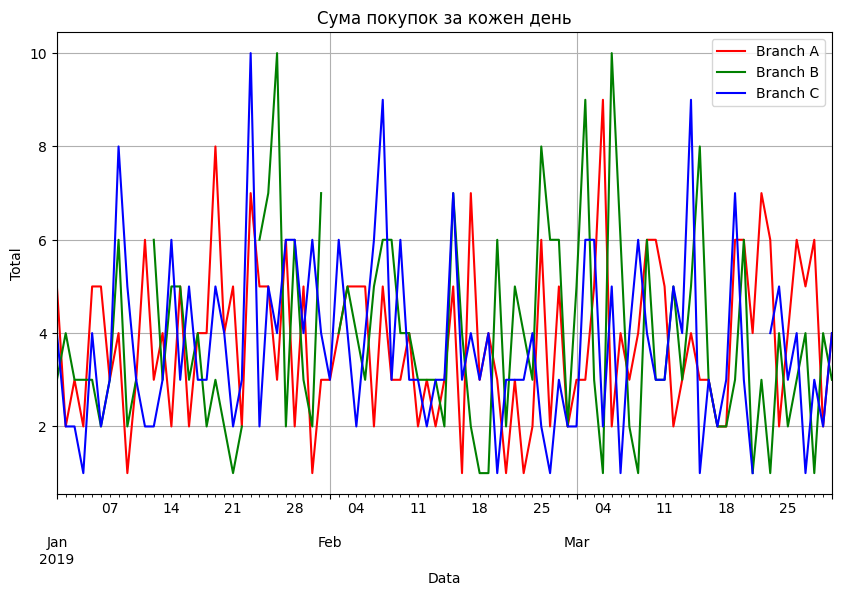

In [38]:


# Create a pivot table with 'Date' as index and branches as columns
# Count the number of Total for each branch on each date
df_branches = df.pivot_table(index='Date', columns='Branch', values='Total', aggfunc='count')
df_branches.columns = ['Branch A', 'Branch B', 'Branch C']
#df_branches

df_branches.plot(color=['red', 'green', 'blue'], figsize=(10, 6), title='Сума покупок за кожен день', xlabel = 'Data', ylabel='Total', grid=True)


Воу-воу, якось тяжко зрозуміти щось на такому графіку. Давайте спробуємо інакше. Покажіть кількість продажів для кодного філіала на окремому графіку.
Досить просто зробити це, вказавши `subplots=True` в функції `plot()`.  
Задайте розмір фігури (10,10).

In [ ]:
# ваш код тут

<font color='blue'>**[Optional]**</font> Давайте зробимо графіки ще зручнішими для сприйняття. Хочеться їх трохи згладити. Одним з методів згладування є ковзне середнє (Moving Average - MA). Суть методу полягає в тому, що значення кожної точки дорівнює середньому значенню N попередніх точок. Це один з найпростіших методів згладжування набору статистичних даних і має кілька варіацій. [Тут](https://www.youtube.com/watch?v=7Rz_ITRIADg) непогано відео на тему.

Для того, щоб порахувати ковзне середнє можемо використати функцію [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).     

Используя параметры window=10 и min_periods=1 выведите сглаженные подневные графики количества продаж по филиалам.

In [ ]:
# ваш код тут

12. В якому місті знаходиться кожен з філіалів?

In [ ]:
# ваш код тут

12. В яких містах покупці частіше розраховуються готівкоюй (`Cash`), а в яких - електронним гаманцем (`Ewallet`)?  
Для виконання цього завдання можна сформувати таблицю, де стрічки будуть відповідати способам оплати (`Payment`), в стовпці - `City`, значення - кількість покупок (вони ж -  продажі).

Цікавить саме відсоткове співвідношення покупок зроблених різними способами =)


In [ ]:
# ваш код тут

<font color='blue'>**[Optional]**</font> 13. Давайте тепер проаналізуємо розподіл цін на товари в різних продуктових лінійках. Наша ціль - знайти відповідь на питання: в якій продуктовій лінійці найбільше дорогих товарів (90-100 у.о.)?

Для початку побудуємо візуалізацію і зробимо це кількома способами. Подумайте, яка є більш інформативною для вас і яку би ви використали для роботи.


  13.1.  На одній фігурі відобразіть гістограму розподілу цін на товари для кожної продуктової лінійкию Тобто на одній фігурі кількість гістограм рівна кількості продуктових лінійок.

In [ ]:
# ваш код тут

13.2. А тепер відобразіть гістограми з однаковою кількість бінів на одному графікую Для зручності використовуйте прозорість alpha не більше 0.4 і переконайтесь, що гістограми різного кольору. Не забудьте про легенду, заголовок.

In [ ]:
# ваш код тут

То яка візуалізація виявилась для вас зручнішою і чому?

ваша відповідь тут

13.3. А тепер знайдіть відповідь на питання за допомогою функцій numpy і pandas.

In [ ]:
# ваш код тут